# Lab 07

In [1]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
import time 

Part 1

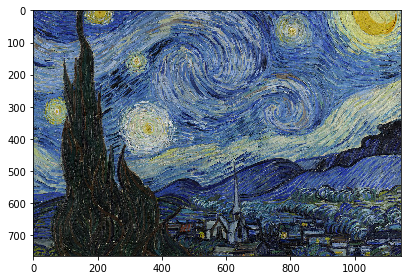

<class 'numpy.ndarray'>
(764, 1145, 3)


In [8]:
# Load image here. Display the image and the image shape.

image = "starry.jpg" 
imageArray = io.imread(image) 
image = io.imshow(imageArray)  
plt.show() 
print(type(imageArray)) 
print(imageArray.shape) 

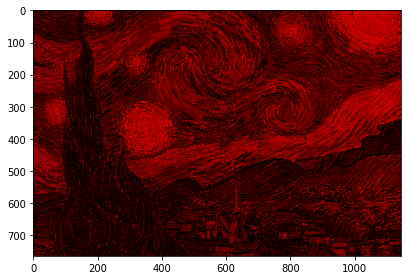

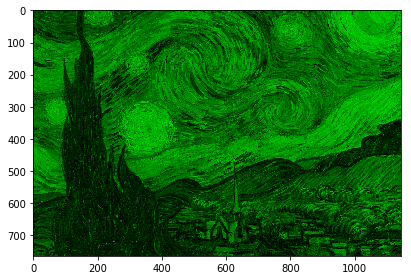

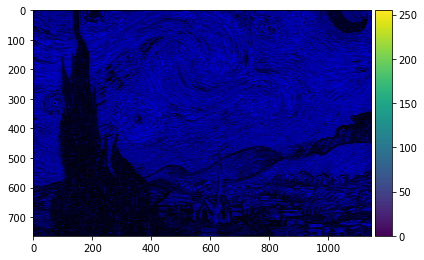

In [31]:
# Make the color arrays and display them on a labelled subplot. 

def imageArrayRed(imageArray): 
    for i in range(imageArray.shape[0]): 
        for j in range(imageArray.shape[1]): 
            imageArray[i,j,1] = 0 
            imageArray[i,j,2] = 0 
    return imageArray 

def imageArrayGreen(imageArray): 
    for i in range(imageArray.shape[0]): 
        for j in range(imageArray.shape[1]): 
            imageArray[i,j,0] = 0 
            imageArray[i,j,2] = 0 
    return imageArray 

def imageArrayBlue(imageArray): 
    for i in range(imageArray.shape[0]): 
        for j in range(imageArray.shape[1]): 
            imageArray[i,j,0] = 0 
            imageArray[i,j,1] = 0 
    return imageArray 

image = "starry.jpg" 
imageArray = io.imread(image) 
image = io.imshow(imageArrayRed(imageArray)) 
plt.show()  

image = "starry.jpg" 
imageArray = io.imread(image) 
image2 = io.imshow(imageArrayGreen(imageArray)) 
plt.show() 

image = "starry.jpg" 
imageArray = io.imread(image) 
image3 = io.imshow(imageArrayBlue(imageArray)) 
plt.show() 

## Part 2

In [33]:
from math import sqrt
from skimage.feature import blob_log, blob_doh
from skimage.color import rgb2gray

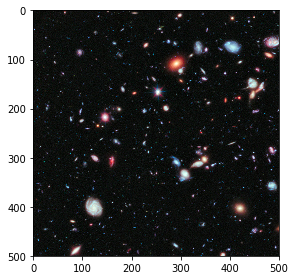

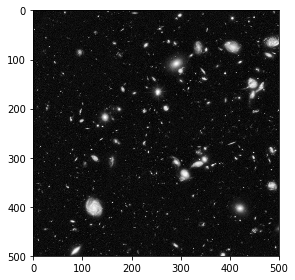

In [36]:
# Here is the image of the Hubble Deep Field. 
image = data.hubble_deep_field()[0:500, 0:500]
io.imshow(image)
plt.show()

image_gray = rgb2gray(image)
io.imshow(image_gray, cmap=plt.cm.gray)
plt.show() 
#Convert the image to grayscale and display next to the original.

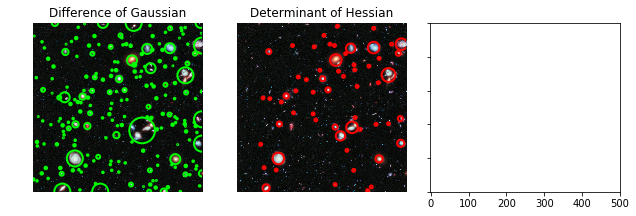

In [39]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

# Apply the two Blob detection methods and measure the time taken by the algorithms. 

#blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1) 

# Compute radii in the 3rd column.
#blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2) 

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_dog, blobs_doh]
colors = ['lime', 'red']
titles = ['Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show() 

In [10]:
# Plot the 2 methods side-by-side along with circle patches. 